In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

valToSelect=1
featureToSelect="ibd"
#helperFeatsDrop=[featureToSelect]+["mental_illness_type_anorexia_nervosa",
#"mental_illness_type_bipolar_disorder",
#"mental_illness_type_bulimia_nervosa",
#"mental_illness_type_depression",
#"mental_illness_type_ptsd_posttraumatic_stress_disorder",
#"mental_illness_type_schizophrenia",
#"mental_illness_type_substance_abuse",
#'depression_bipolar_schizophrenia'] # mental_illness
#helperFeatsDrop=[featureToSelect]+['cancer_treatment'] #'cancer'
#helperFeatsDrop=[featureToSelect] #'lung_disease'
#helperFeatsDrop=[featureToSelect] #'liver_disease'
#helperFeatsDrop=[featureToSelect]+['diabetes_type'] # diabetes
helperFeatsDrop=[featureToSelect]+['ibd_diagnosis_refined','ibd_diagnosis'] # ibd

#agpDF=pd.read_csv("resultsKNNImputationOnAGPmetadata.csv",low_memory=False)
#agpDF=agpDF.set_index(["sample_name","host_subject_id"])

#yDF=pd.DataFrame(agpDF[featureToSelect])
#yDF

#agpDF=agpDF.drop(helperFeatsDrop, axis=1)

#X_train, X_val, y_train, y_val = train_test_split(agpDF, yDF, test_size=0.2, random_state=10)

#print(X_train.shape)
#print(X_val.shape)

In [ ]:
import pickle
pickle_in = open("../data/model/2.21.rar1000_clean_biom.pkl","rb")
agp_biom = pickle.load(pickle_in)
#agp_biom.head()

In [ ]:
print(agp_biom.shape)
agp_biom['sample_name']=agp_biom['sample_name'].apply(lambda x: '.'.join(x.split('.')[:-1]))
#print(agp_biom['sample_name'].head())
print(agp_biom.shape)
#X_train.head()

In [ ]:
#agp_biom[agp_biom['sample_name'=='10317.000011338']==True]
#agp_biom[agp_biom['sample_name']=='10317.000067572']['sample_name'].value_counts()
print(agp_biom.shape)
print(agp_biom['sample_name'].value_counts().head())
DropDupsAGP_biom=agp_biom.drop_duplicates(subset=['sample_name'], keep='first')
print(DropDupsAGP_biom['sample_name'].value_counts().head())
print(DropDupsAGP_biom.shape)
DropDupsAGP_biom=DropDupsAGP_biom.set_index('sample_name')

In [ ]:
#Do PCA
from sklearn.decomposition import PCA
DropDupsAGP_biom=DropDupsAGP_biom.astype('float32')

#for i in DropDupsAGP_biom.shape[0]:
#    DropDupsAGP_biom.iloc[i]
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(DropDupsAGP_biom.fillna(value=0))#.iloc[:10])
principalDf = pd.DataFrame(data = principalComponents)
             #,columns = ['principal component 1', 'principal component 2'])
principalDf

In [ ]:
#DropDupsAGP_biom=DropDupsAGP_biom.astype('float32')
from sklearn.decomposition import IncrementalPCA
transformer=IncrementalPCA(batch_size=1, copy=True, n_components=5, whiten=False)
principalComponents = transformer.fit_transform(DropDupsAGP_biom)
print(principalComponents.shape)
principalDf = pd.DataFrame(data = principalComponents)
             #,columns = ['principal component 1', 'principal component 2'])
principalDf

In [ ]:
from sklearn import decomposition

n_comp = 3
svd = decomposition.TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd.fit(DropDupsAGP_biom.fillna(value=0).iloc[:10])
print(svd.explained_variance_ratio_.sum())

In [9]:
from sklearn.decomposition import PCA

##DONT DO ABOVE, DO THIS FROM NOW ON, ITS THE IMPUTED WITHOUT LEAKS
agpDFTRAIN=pd.read_csv("resultsKNNImputationOnAGPmetadataTRAIN80.csv",low_memory=False)
agpDFTRAIN=agpDFTRAIN.set_index(["sample_name","host_subject_id"])
agpDFTEST=pd.read_csv("resultsKNNImputationOnAGPmetadataTEST20.csv",low_memory=False)
agpDFTEST=agpDFTEST.set_index(["sample_name","host_subject_id"])

agpNewDF=pd.concat([agpDFTRAIN,agpDFTEST])
agpNewDF=agpNewDF.reset_index()
#Load in the biom stuff

#print(DropDupsAGP_biom.shape)
#FullBiomMetaDF=DropDupsAGP_biom.join(agpNewDF, on='sample_name')
#FullBiomMetaDF=DropDupsAGP_biom.set_index('sample_name').join(agpNewDF.set_index('sample_name'))
#print(FullBiomMetaDF.shape)
#DropDupsAGP_biom1Host=FullBiomMetaDF.drop_duplicates(subset=['host_subject_id'], keep='first')
#print(DropDupsAGP_biom1Host.shape)

###################

print(agpNewDF.shape)
agpNewDF=agpNewDF.drop_duplicates(subset=['host_subject_id'], keep='first')
print(agpNewDF.shape)

agpNewDF=agpNewDF.set_index(["sample_name","host_subject_id"])
yDF=pd.DataFrame(agpNewDF[featureToSelect])
#yDF=pd.DataFrame(DropDupsAGP_biom1Host[featureToSelect])

#agpNewDF=agpNewDF.drop('index',axis=1)
agpNewDF=agpNewDF.drop(helperFeatsDrop, axis=1)

#DropDupsAGP_biom1Host=DropDupsAGP_biom1Host.drop(helperFeatsDrop, axis=1)

X_train, X_val, y_train, y_val = train_test_split(agpNewDF, yDF, test_size=0.2, random_state=10)
#X_train, X_val, y_train, y_val = train_test_split(DropDupsAGP_biom1Host, yDF, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_val.shape)

(19439, 143)
(16537, 143)
(13229, 138)
(3308, 138)


C:\Users\Ryan\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Wall time: 795 ms


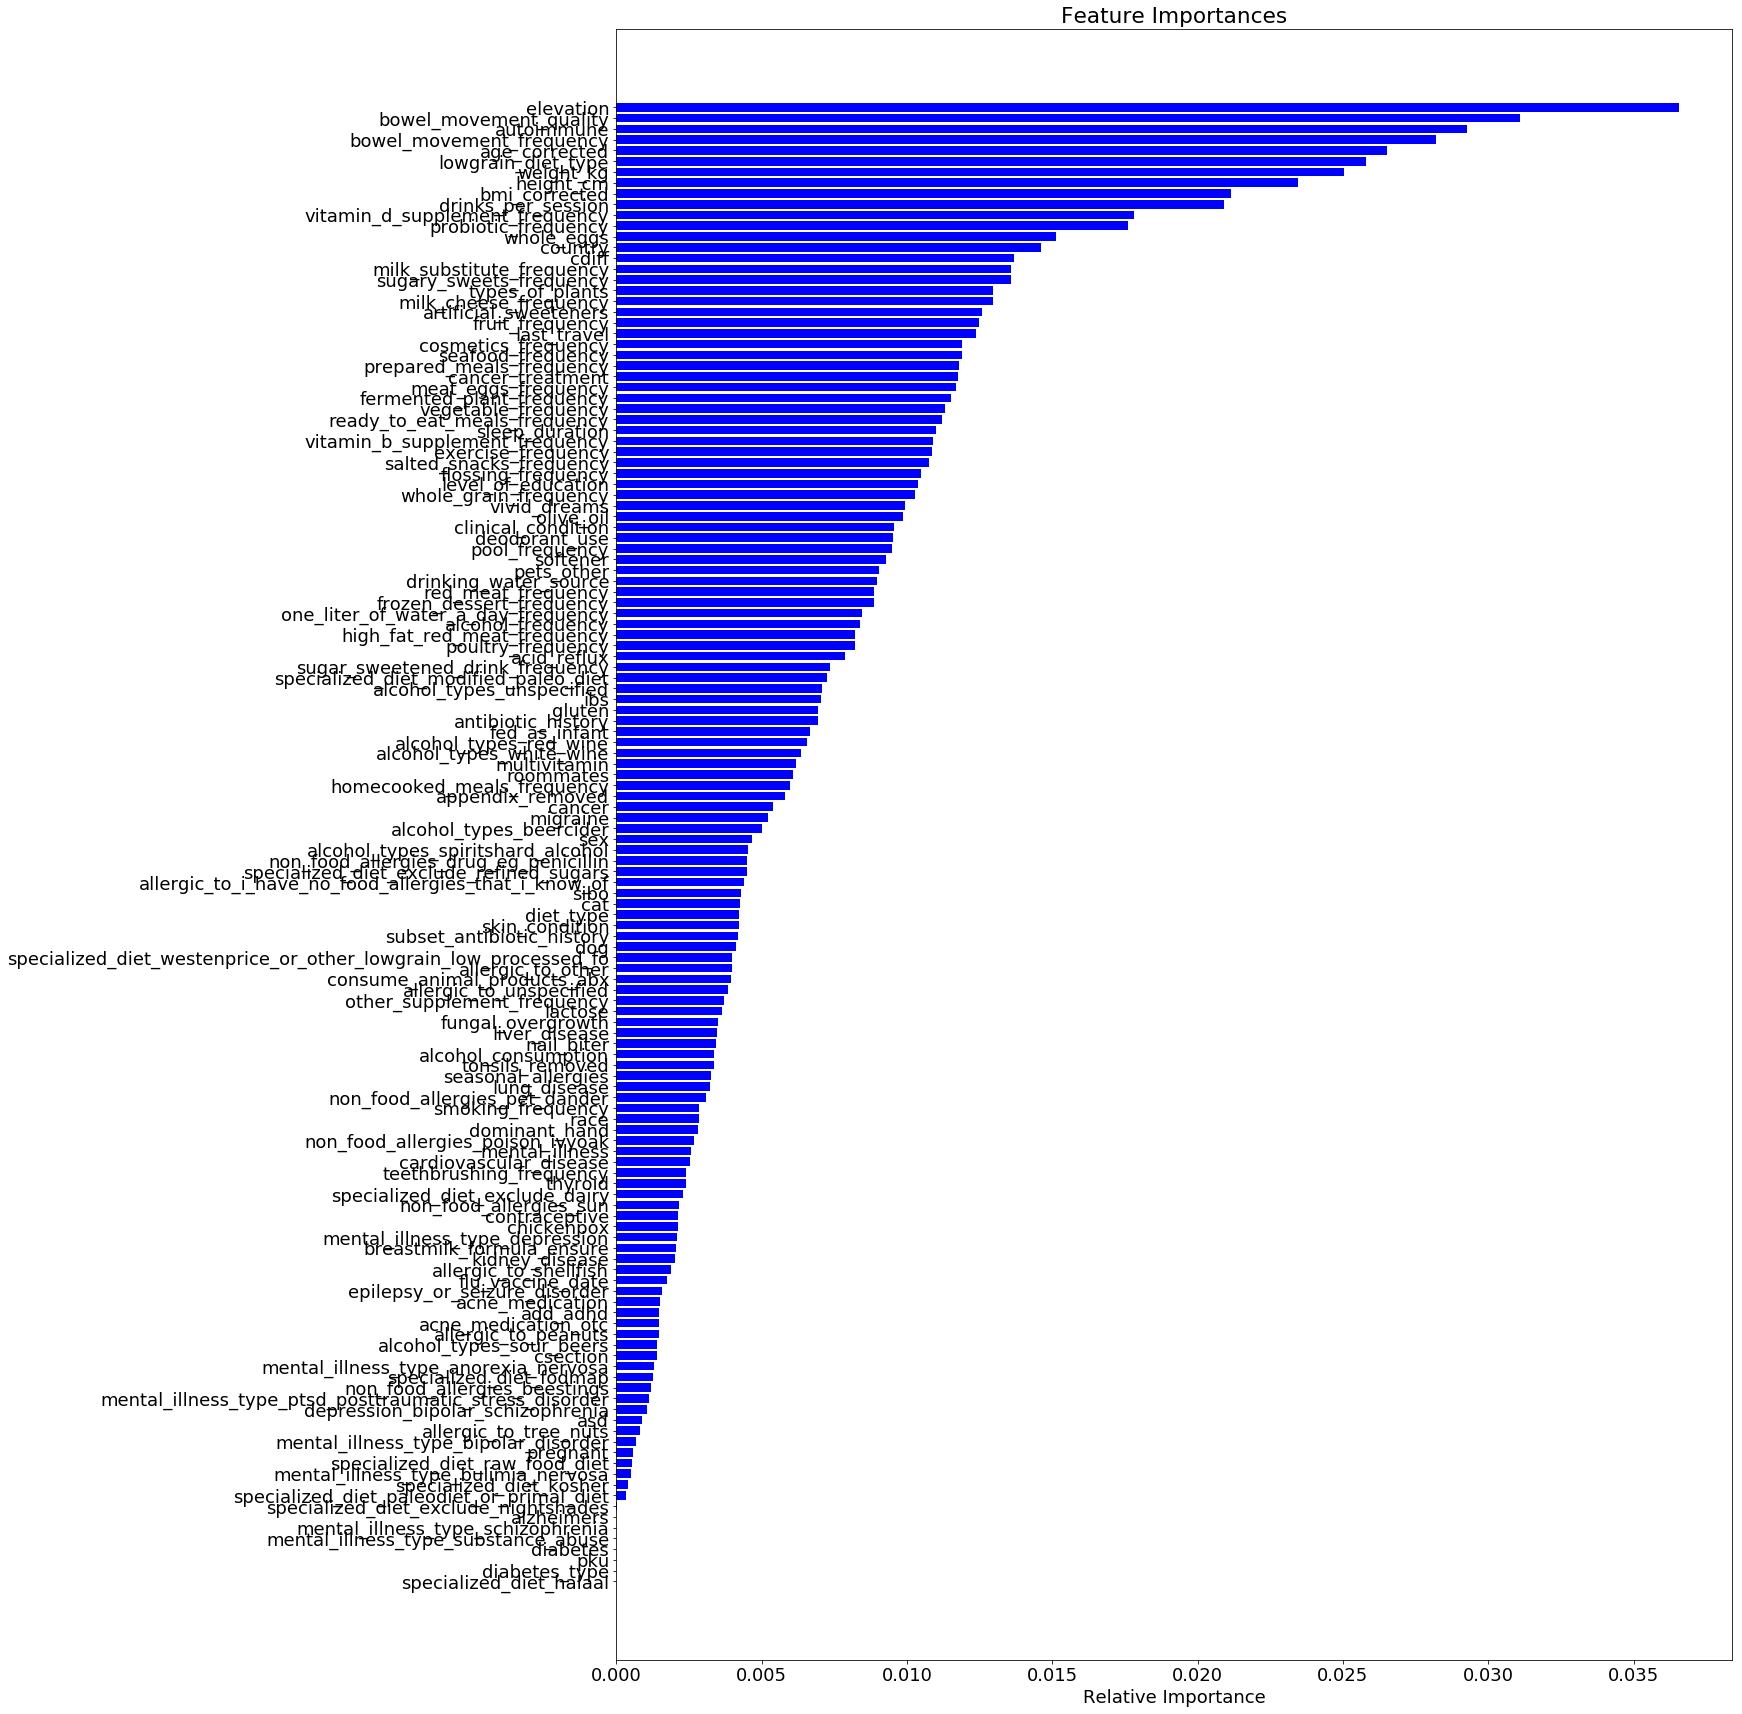

In [12]:
%%time
#Let me begin with a simple RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

clf = RandomForestClassifier(criterion='entropy',n_jobs=-1,n_estimators=10)#,max_leaf_nodes=25,max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
y_train_pred = clf.predict(X_train)

print (accuracy_score(y_pred, y_val))
print (mean_absolute_error(list(map(int,y_pred)), y_val))
print (mean_absolute_error(y_pred, y_val))
print("Precision: " + str(precision_score(y_val, y_pred, average='binary')))
print("Recall: " + str(recall_score(y_val, y_pred, average='binary')))
print("F1 Score: " + str(f1_score(y_val, y_pred, average='binary')))
#perf_measure(list(y_val),list(y_pred))
#cm=confusion_matrix(y_val, y_pred)
#TP = cm[0][0]
#FP = cm[0][1]
#FN = cm[1][0]
#TN = cm[1][1]
#print('True Pos: '+str(TP))
#print('False Pos: ' +str(FP))
#print('False Neg: ' + str(FN))
#print('True Neg: ' + str(TN))

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,30))
plt.rcParams.update({'font.size': 18})
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

In [ ]:
agpDFTRAIN=pd.read_csv("resultsKNNImputationOnAGPmetadataTRAIN80.csv",low_memory=False)
agpDFTRAIN=agpDFTRAIN.set_index(["sample_name","host_subject_id"])
agpDFTEST=pd.read_csv("resultsKNNImputationOnAGPmetadataTEST20.csv",low_memory=False)
agpDFTEST=agpDFTEST.set_index(["sample_name","host_subject_id"])

agpNewDF=pd.concat([agpDFTRAIN,agpDFTEST])
agpNewDF=agpNewDF[agpNewDF['ibd']==1]
print(agpNewDF['bowel_movement_frequency'].value_counts())

In [ ]:
#Original data to compare against above 'with imputed' ones
dietDF = pd.read_csv("cleanedUpMetadata_noVio_AGP_humfece.csv",low_memory=False)
dietDFNewDF=dietDF[dietDF['ibd']==1]
print(dietDFNewDF['bowel_movement_frequency'].value_counts())